# Analysis of International Fottball Results
**First** Exploring Data **Second** answes 8 questions 
 



In [ ]:
pip install scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np 
import os 

plt.style.use('ggplot')
df = pd.read_csv('results.csv')

# Exoloring Data set


In [ ]:

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [ ]:

##number of rows and colums 
df.shape


(41846, 9)

In [ ]:
df.describe()

,home_score,away_score,year
count,41846.000000,41846.000000,41846.000000
mean,1.743703,1.186374,1990.625580
std,1.752224,1.403199,24.317029
min,0.000000,0.000000,1872.000000
25%,1.000000,0.000000,1978.000000
50%,1.000000,1.000000,1997.000000
75%,2.000000,2.000000,2009.000000
max,31.000000,21.000000,2020.000000


# Analysis and Answer the Questions


In [ ]:
##fIRST
# Count games around years 
df['year']=pd.DatetimeIndex(df['date']).year
year=df['year'].value_counts().sort_index()
print(year)
# Average Goals Scores Around years
df['Total Goals ']=df['home_score']+df['away_score']
average = df.groupby(['year']).mean()

## Plot average total gopals around years
fig, ax1 = plt.subplots()
ax1.plot(average.index,average['Total Goals '],color = 'blue')
ax1.set_ylabel('Average Goals Pere Game')

ax2=ax1.twinx()
ax2.plot(year)
ax2.set_ylabel('Number of Games')
plt.tight_layout()
plt.title('International Football Development')
plt.show()


In [ ]:
##Second
# The effect of playing at home

In [ ]:
con=[(df['home_score']==df['away_score']),(df['home_score']>df['away_score']),(df['home_score']<df['away_score'])]
val=[0,1,2]
val2=['no_win',df['home_team'],df['away_team']]
df['result']=np.select(con,val)
df['who_win']=np.select(con,val2)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,Total Goals,result,who_win
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,0,0,no_win
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,6,1,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,1,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,4,0,no_win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,1,Scotland


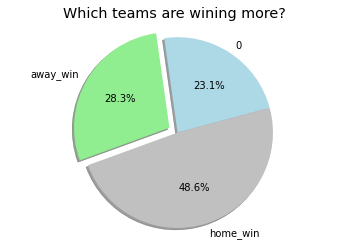

In [ ]:

#home advantage?

con=[(df['home_team']==df['who_win']),(df['away_team']==df['who_win'])]
val=['home_win','away_win']
val2=[1,1]
df['home_away_win']=np.select(con,val)
df['home_away_win2']=np.select(con,val2)
##home advantage 
data1=df.groupby('home_away_win').count()
data1[['who_win']]
pcolors = ['lightblue','lightgreen','silver']
my_explode = (0, 0.1, 0)
plt.pie(data1['who_win'], labels=data1.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=pcolors, explode=my_explode)
plt.title('Which teams are wining more?')
plt.axis('equal')
plt.show()

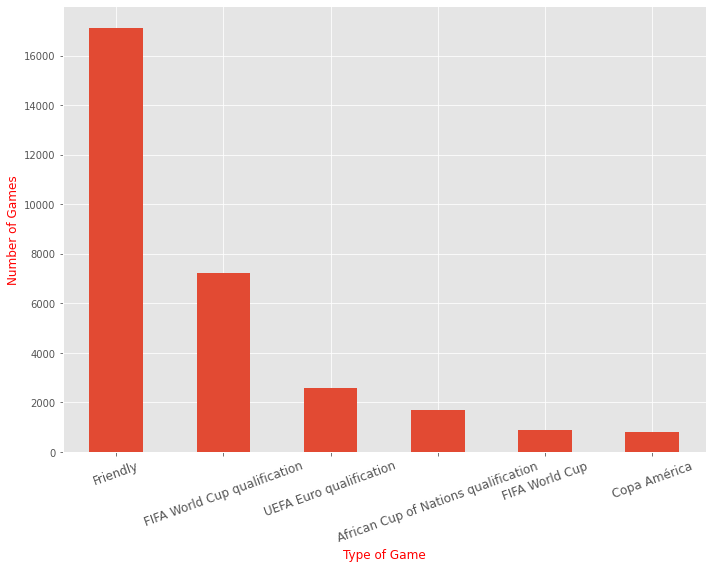

In [ ]:
##Third 
# Type of Match based on tournanment column
plt.figure(figsize=(10,8))
type=df['tournament'].value_counts()
ax1=type[0:6].plot(kind='bar')
ax1.set_xlabel('Type of Game',color = 'red')
ax1.set_ylabel('Number of Games',color = 'red')
plt.xticks(fontsize=12,rotation=20)
plt.tight_layout()
plt.show()


In [ ]:
#fourth 
##Most number of scores  and in which Country in which year (homw&away)
non_nuetral=df[df['neutral']== False]
most_home_goals=df.iloc[non_nuetral['home_score'].idxmax()]
print('*****Most number of scores in Home***** ' )
print(most_home_goals['home_score'])
print(most_home_goals['home_team'])
most_away_goals=df.iloc[non_nuetral['away_score'].idxmax()]
print('*****Most number of scores in away*****')
print(most_away_goals['home_score'])
print(most_away_goals['home_team'])

*****Most number of scores in Home***** 
31
Australia
*****Most number of scores in away*****
2
Japan


In [ ]:
#5 How many countries have played inernational football games?
import numpy as np
home = pd.unique(df['home_team'])
away = pd.unique(df['away_team'])
countries = pd.unique(np.concatenate((home, away)))
print(len(countries))


313


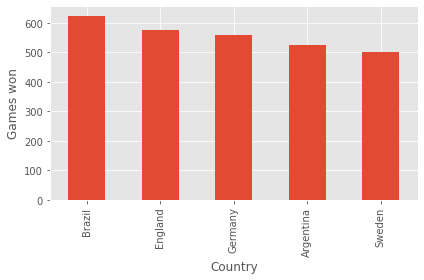

In [ ]:
#6 Which country won the most games so far?

df['winner'] = np.where(df['home_score'] >
df['away_score'], df['home_team'],
np.where(df['home_score'] ==
df['away_score'],
'Draw', df['away_team']))

winners = df['winner'].value_counts()
ax1 = winners[1:6].plot(kind = 'bar')
ax1.set_xlabel('Country')
ax1.set_ylabel('Games won')
plt.tight_layout()
plt.show()


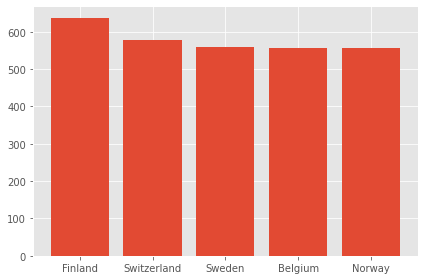

In [ ]:
#7 Which countries conceded the most goals?

summary = pd.DataFrame(columns = ['Country', 'Goals scored',
 'Goals conceded'])

for country in countries:
    goals_scored = df.loc[df.home_team == country, 'home_score'].sum()
    + df.loc[df.away_team == country, 'away_score'].sum()

    goals_conceded = df.loc[df.home_team == country, 'away_score'].sum()
    + df.loc[df.away_team == country, 'home_score'].sum()

    summary = summary.append({'Country': country,
      'Goals scored': goals_scored,
     'Goals conceded': goals_conceded},
     ignore_index = True)

summary = summary.set_index('Country')
summary = summary.sort_values(by = ['Goals conceded'], ascending = False)
plt.bar(summary.index[0:5], summary['Goals conceded'] [0:5])
plt.tight_layout()
plt.show()



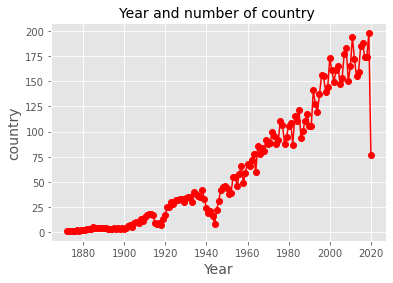

In [ ]:
#8 -how has the number of countries changed 
df["year"]=pd.to_datetime(df['date']).dt.year
data_c=df[['year','country']]
data_c = data_c.drop_duplicates()
data_c1=data_c.groupby('year').count()

plt.plot(data_c1.index, data_c1['country'], color='red', marker='o')
plt.title('Year and number of country ', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('country', fontsize=14)
plt.grid(True)
plt.show()